#Problem Statement

As far as industry is concerned, the major challenge is finding the right talent with minimal resources over the internet in a shortest amount of time. Bringing efficiency in the entire process requires overcoming three challenges.

* Making a distinction between the right and the wrong candidates

* Analyzing CVs of candidates

* Making sure candidates are capable of doing the job before hiring them.


# Objective

* For the purpose of extracting the required information from the resumes, we need a resume parser that uses NLP.

* In order to facilitate the selection of resumes for recruiters wothout having to spend time going through each resume individually.

* Assisting the candidates in finding and applying for the most suitable job positions.

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import spacy
import pickle
import random

from spacy import displacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Import Dataset

Here I am Using Kaggle Dataset

In [2]:
Resumes = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
Resumes.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


#EDA

In [4]:
Resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
Resumes.isnull().sum()

Category    0
Resume      0
dtype: int64

Finding the length, mean, median, standard deviation and skewness of the characters in the initial dataset before cleaning

In [6]:
Initial_characters = Resumes['Resume'].apply(len)
Initial_characters

0      4786
1      1268
2      1871
3      6995
4       452
       ... 
957    2130
958    2306
959    3319
960     767
961    1955
Name: Resume, Length: 962, dtype: int64

In [7]:
print("Total Characters in Resumes: ", Initial_characters.sum())
print("Mean of Characters in Resumes: ", Initial_characters.mean())
print("Median of Characters in Resumes: ", Initial_characters.median())
print("Standard Deviation of Characters in Resumes: ", Initial_characters.std())
print("Skew of characters in Resumes: ", Initial_characters.skew())

Total Characters in Resumes:  3040271
Mean of Characters in Resumes:  3160.364864864865
Median of Characters in Resumes:  2355.0
Standard Deviation of Characters in Resumes:  2886.528520564754
Skew of characters in Resumes:  1.9350510895922923


Finding the length, mean, median, standard deviation and skew of the Words in the initial dataset before cleaning.

**apply(lambda x: )**
apply() can be used with python lambda to execute expression. A lambda function in python is a small anonymous function that can take any number of arguments and execute an expression

In [8]:
Initial_words = Resumes['Resume'].apply(lambda x: len(str(x). split(' ')))
Initial_words

0      643
1      200
2      262
3      888
4       68
      ... 
957    303
958    301
959    520
960    103
961    365
Name: Resume, Length: 962, dtype: int64

In [9]:
print('Total words in Resumes: ', Initial_words.sum())
print('Mean of Words in Resumes: ', Initial_words.mean())
print('Median of Words in Resumes: ', Initial_words.median())
print('Standard deviation of Words in Resumes: ', Initial_words.std())
print('Skew of Words in Resumes: ', Initial_words.skew())

Total words in Resumes:  416594
Mean of Words in Resumes:  433.04989604989606
Median of Words in Resumes:  326.0
Standard deviation of Words in Resumes:  395.8254479299144
Skew of Words in Resumes:  1.9913299109425107


#Data Preprocessing

Here I am performing LabelEncoder which I imported from sklearn.preprocessing. The purpose of LabelEncoder is to Normalize labels. It can be used to transform non-numerical labels to numerical labels by using this fit label encoder. 

Now, I am encoding the Category label from string datatype to numerical datatype.

In [10]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
Resumes["Encoded_Skill"] = le_encoder.fit_transform(Resumes["Category"])
Resumes.head()

,Category,Resume,Encoded_Skill
0,Data Science,Skills * Programming Languages: Python (pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6


In [11]:
Resumes.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [12]:
print("Unique categories")

print("                 ")

print(Resumes.Category.unique())

Unique categories
                 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


#Data Cleaning

Initially, I am cleaning the dataset by using Regular experssion (re).

sub() function belongs to Regular Expression (re) module in python. It returns a string where all matching occurances of the specified pattern are replaced by the replace string.

In [13]:
import re
import string

def clean_text(Resume):
  Resume = Resume.lower()
  Resume = re.sub('\[.*?\]', '', Resume)
  Resume = re.sub('[%s]' % re.escape(string.punctuation),'', Resume)
  Resume = re.sub('\w*\d\w*', '', Resume)
  Resume = re.sub("[0-9" "]+", " ", Resume)
  Resume = re.sub('[‘’“”…]', '', Resume)
  Resume = re.sub(r'[^\x00-\x7F]+','', Resume)
  Resume = re.sub(r'[^ \w\.]', '', Resume)
  return Resume

clean = lambda x: clean_text(x)

In [14]:
Resumes['Resume'] = Resumes.Resume.apply(clean)
Resumes.Resume

0      skills  programming languages python pandas nu...
1      education details may  to may  be   uitrgpvdat...
2      areas of interest deep learning control system...
3      skills  r  python  sap hana  tableau  sap hana...
4      education details  mca   ymcaust  faridabad  h...
                             ...                        
957    computer skills  proficient in ms office word ...
958     willingness to accept the challenges  positiv...
959    personal skills  quick learner  eagerness to l...
960    computer skills  software knowledge mspower po...
961    skill set os windows  database mysql sql serve...
Name: Resume, Length: 962, dtype: object

Before removing the STOPWORDS, Here I am checking the frequency of the Top 20 words from the Resumes dataset, where the column is Resume.

In [15]:
frequency = pd.Series(' '.join(Resumes['Resume']).split()).value_counts()[:20]
frequency

and            16556
the            11264
of              8769
to              7553
in              5504
for             5246
exprience       3829
with            3792
details         3043
on              2732
project         2730
a               2310
as              2285
data            1982
company         1959
management      1768
team            1609
is              1569
maharashtra     1435
year            1299
dtype: int64

Here I removed the stopwords from the Resume Dataset, where the column is 'Resume'.

In [16]:
stop = stopwords.words('english')
Resumes['Resume'] = Resumes['Resume'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Now, Again I am checking the frequency of the Top 20 words after the removal of Stopwords.

In [17]:
frequency_after_StopWords = pd.Series(' '.join(Resumes['Resume']).split()).value_counts()[:20]
frequency_after_StopWords

exprience      3829
details        3043
project        2730
data           1982
company        1959
management     1768
team           1609
maharashtra    1435
year           1299
testing        1167
system         1153
development    1151
less           1145
business       1125
test           1116
using          1085
database       1032
application     965
engineering     943
skills          920
dtype: int64

In [18]:
# import spacy
# from spacy import displacy

# nlp = spacy.load("en_core_web_sm")
# text=nlp(Resumes["Resume"][0])
# displacy.render(text, style = "ent",jupyter='False')

Now, I am interested to know the number of characters in each sentence. This gives the idea of resume length.

In [19]:
characters = Resumes['Resume'].apply(len)
characters

0      3899
1       968
2      1452
3      5639
4       354
       ... 
957    1655
958    1787
959    2498
960     664
961    1467
Name: Resume, Length: 962, dtype: int64

In [20]:
print('Total Characters in Resumes : ', characters.sum())
print('Mean of each characters in Resumes : ', characters.mean())
print('Median of characters in Resumes: ', characters.median())
print('Standard Deviation of characters in Resumes : ', characters.std())
print('Skew of characters in Resumes: ', characters.skew())

Total Characters in Resumes :  2387578
Mean of each characters in Resumes :  2481.8898128898127
Median of characters in Resumes:  1816.0
Standard Deviation of characters in Resumes :  2251.0959283391235
Skew of characters in Resumes:  1.8819864219115294


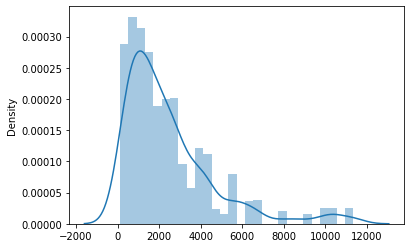

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x=characters)

Calculating each Word Characteristic in dataframe

In [22]:
words = Resumes['Resume'].apply(lambda x: len(str(x).split(' ')))
words.head()

0    467
1     97
2    165
3    645
4     42
Name: Resume, dtype: int64

In [23]:
print('Total Number of Words in Resumes: ', words.sum())
print('Mean of each word in Resumes: ', words.mean())
print('Median of word in Resumes: ', words.median())
print('Standard Deviation of word in dataset: ', words.std())
print('Skew of word dataset: ', words.skew())

Total Number of Words in Resumes:  277991
Mean of each word in Resumes:  288.9719334719335
Median of word in Resumes:  213.0
Standard Deviation of word in dataset:  261.54449255141833
Skew of word dataset:  1.8849486161281603


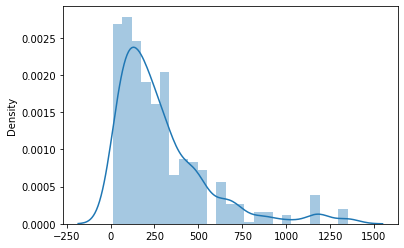

In [24]:
sns.distplot(x=words)

# Resumes Dataset Visualization based on category

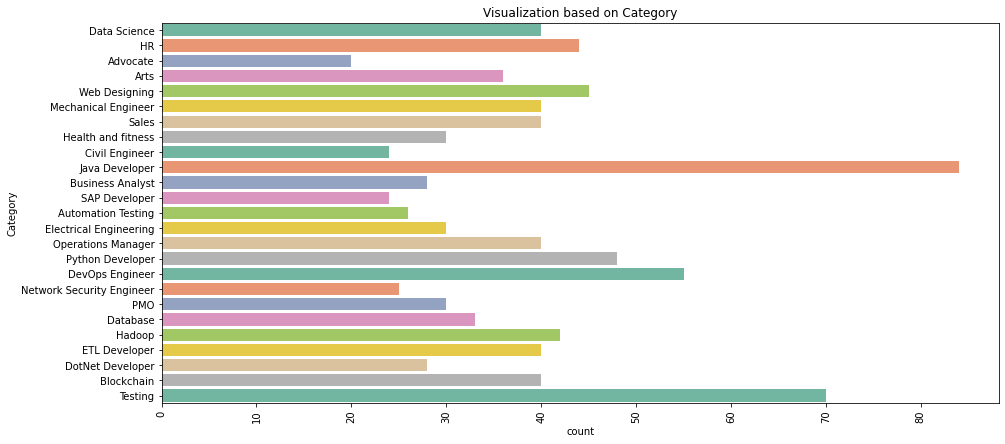

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("Visualization based on Category")
plt.xticks(rotation=90)
sns.countplot(y='Category', data=Resumes, palette=("Set2"))
plt.show()

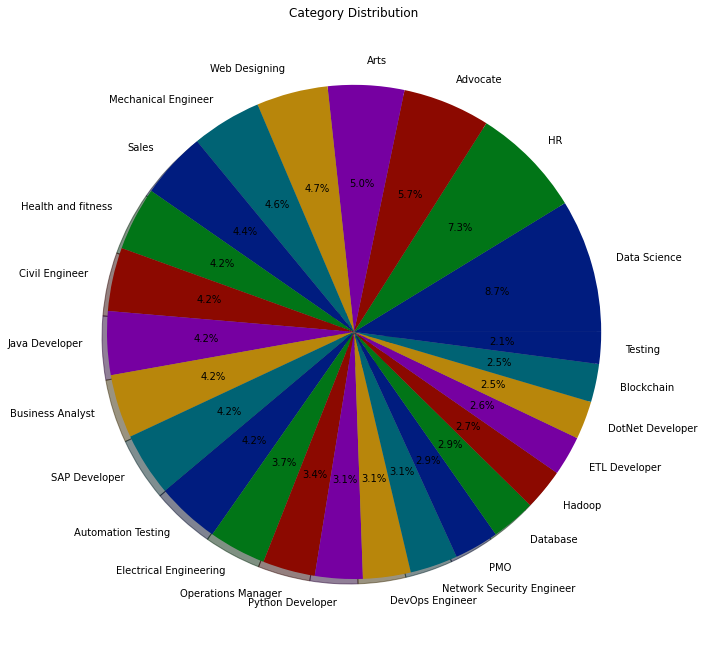

In [26]:
from matplotlib.gridspec import GridSpec
targetCounts = Resumes.Category.value_counts()
targetCategories = Resumes.Category.unique()

# Mark square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('plasma')
plt.subplot(the_grid[0,1], aspect=1, title='Category Distribution')

source_pie = plt.pie(targetCounts, labels=targetCategories, autopct = "%1.1f%%", shadow=True)
plt.show()

#Feature extraction

In [27]:
from collections import Counter
import seaborn as sns

In [28]:
frequency_words = pd.Series(' '.join(Resumes['Resume']).split()).value_counts()[:50]
frequency_words = frequency_words.reset_index()
frequency_words.columns = ["Frequency_words", "frequency"]
frequency_words.head()


,Frequency_words,frequency
0,exprience,3829
1,details,3043
2,project,2730
3,data,1982
4,company,1959


In [29]:
words = frequency_words["Frequency_words"].tolist()
words

['exprience',
 'details',
 'project',
 'data',
 'company',
 'management',
 'team',
 'maharashtra',
 'year',
 'testing',
 'system',
 'development',
 'less',
 'business',
 'test',
 'using',
 'database',
 'application',
 'engineering',
 'skills',
 'work',
 'pune',
 'pvt',
 'java',
 'services',
 'sql',
 'reports',
 'monthscompany',
 'client',
 'developer',
 'customer',
 'server',
 'sales',
 'software',
 'various',
 'requirements',
 'process',
 'technical',
 'design',
 'working',
 'education',
 'operations',
 'like',
 'responsibilities',
 'india',
 'ltddescription',
 'web',
 'january',
 'per',
 'automation']

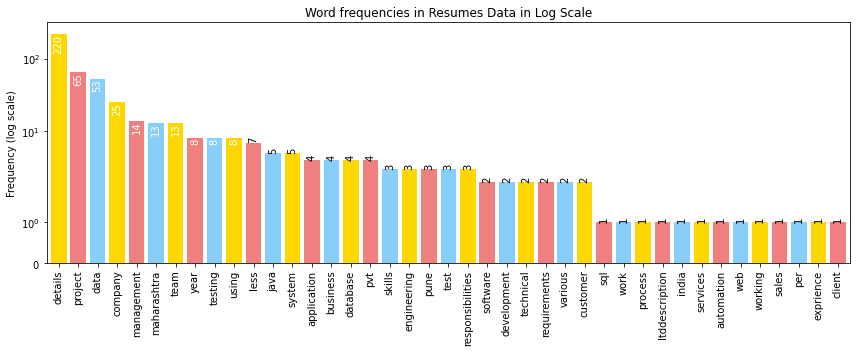

In [30]:
words = ['exprience',
 'details',
 'project',
 'data',
 'company',
 'management',
 'team',
 'maharashtra',
 'year',
 'testing',
 'system',
 'development',
 'less',
 'business',
 'test',
 'using',
 'database',
 'application',
 'engineering',
 'skills',
 'work',
 'pune',
 'pvt',
 'java',
 'services',
 'sql',
 'reports',
 'monthscompany',
 'client',
 'developer',
 'customer',
 'server',
 'sales',
 'software',
 'various',
 'requirements',
 'process',
 'technical',
 'design',
 'working',
 'education',
 'operations',
 'like',
 'responsibilities',
 'india',
 'ltddescription',
 'web',
 'january',
 'per',
 'automation']

indices = np.random.zipf(1.6, size = 500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
plt.bar(x,y,color=['gold','lightcoral','lightskyblue'])
plt.title("Word frequencies in Resumes Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog')
plt.xticks(rotation=90)
for i, (tag,count) in enumerate(tf.most_common(50)):
  plt.text(i,count,f'{count}', rotation=90, ha='center', va='top' if i <10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [31]:
def wordBarGraphFunction_1(df,column,title):
  topic_words = [z.lower() for y in 
                 [x.split() for x in df[column] if isinstance(x,str)]
                 for z in y]
  word_count_dict = dict(Counter(topic_words))
  popular_words = sorted(word_count_dict, key = word_count_dict.get,reverse=True)
  popular_words_nonstop = [w for w in popular_words if w not in stopwords.words('english')]
  plt.style.use('fivethirtyeight')
  sns.barplot(x=np.arange(20), y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
  plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]), rotation=90)
  plt.title(title)
  plt.show()

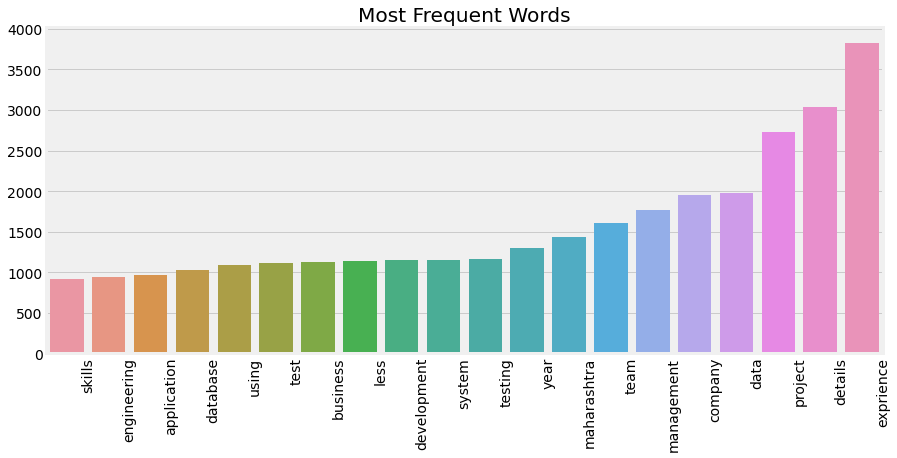

In [32]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(Resumes,"Resume","Most Frequent Words")

#WordCloud

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
  #set figure size
  plt.figure(figsize=(40,30))
  #Display image
  plt.imshow(wordcloud)
  #No axis details
  plt.axis("off");

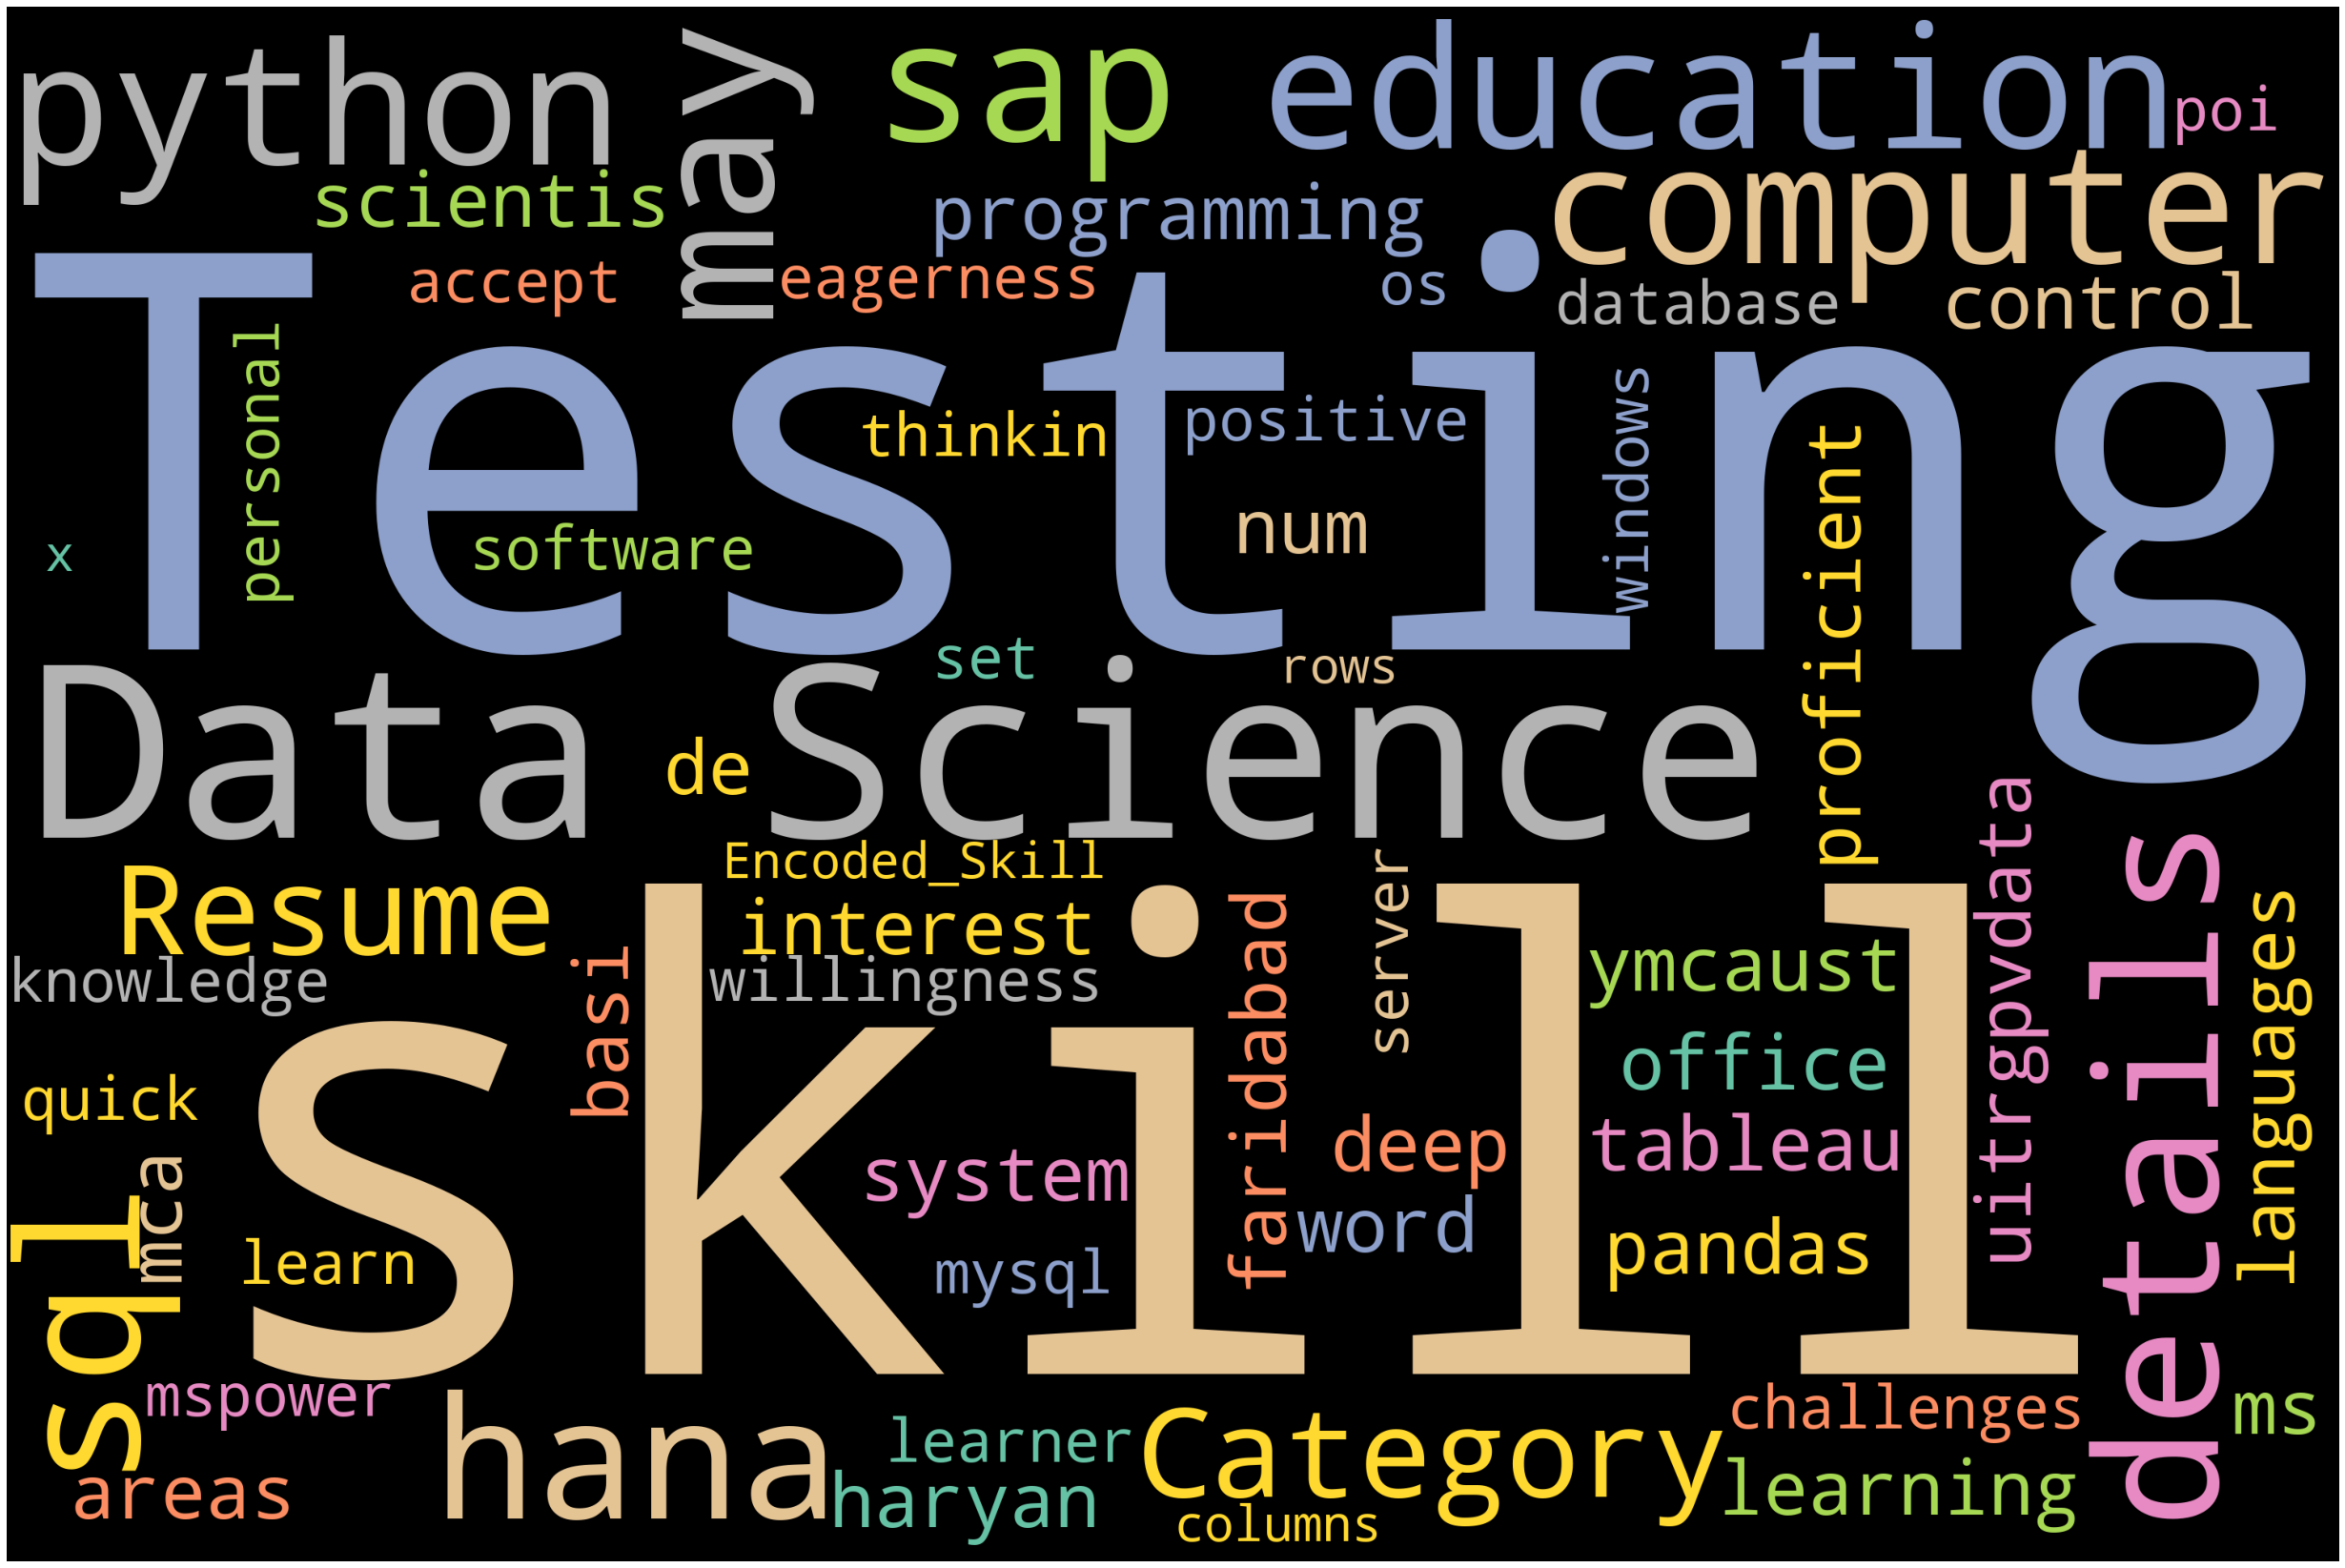

In [34]:
#Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(Resumes))
plot_cloud(wordcloud)                                                                                                                                          

#Bag of Words

In [35]:
requiredText = Resumes["Resume"]
requiredTarget = Resumes["Encoded_Skill"].values
Countvectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english')
bag = Countvectorizer.fit_transform(requiredText)
Countvectorizer.vocabulary_

{'skills': 7562,
 'programming': 6375,
 'languages': 4352,
 'python': 6538,
 'pandas': 5837,
 'numpy': 5577,
 'scipy': 7262,
 'scikitlearn': 7259,
 'matplotlib': 4808,
 'sql': 7744,
 'java': 4139,
 'javascriptjquery': 4146,
 'machine': 4623,
 'learning': 4423,
 'regression': 6778,
 'svm': 7994,
 'nave': 5424,
 'bayes': 764,
 'knn': 4283,
 'random': 6633,
 'forest': 3148,
 'decision': 2054,
 'trees': 8493,
 'boosting': 921,
 'techniques': 8169,
 'cluster': 1372,
 'analysis': 313,
 'word': 9058,
 'embedding': 2584,
 'sentiment': 7388,
 'natural': 5419,
 'language': 4351,
 'processing': 6310,
 'dimensionality': 2307,
 'reduction': 6745,
 'topic': 8397,
 'modelling': 4998,
 'lda': 4396,
 'nmf': 5514,
 'pca': 5924,
 'neural': 5484,
 'nets': 5472,
 'database': 1954,
 'visualizations': 8892,
 'mysql': 5378,
 'sqlserver': 7754,
 'cassandra': 1140,
 'hbase': 3526,
 'elasticsearch': 2555,
 'dcjs': 2024,
 'plotly': 6085,
 'kibana': 4268,
 'ggplot': 3333,
 'tableau': 8060,
 'regular': 6779,
 'expr

#Vectorization

Count Vectorizer tells the frequency of a word

In [36]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(Resumes["Resume"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

,term,occurrences,frequency
0,aaa,5,0.000018
1,aag,3,0.000011
2,aakruti,3,0.000011
3,ab,14,0.000051
4,abacus,20,0.000073
...,...,...,...
9267,zero,11,0.000040
9268,zhypility,16,0.000059
9269,zone,31,0.000114
9270,zookeeper,6,0.000022


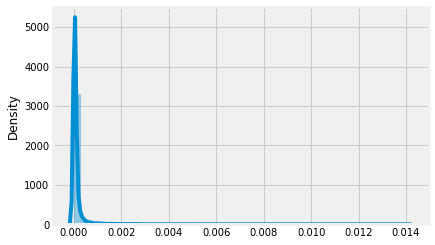

In [37]:
sns.distplot(x=[word_freq_df['frequency']])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english',max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

#Model Building

**Data Preparation**

In [40]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size=0.2)
print("X Train shape:",x_train.shape)
print("Y Train shape:",y_train.shape)
print("x Test shape:",x_test.shape)
print("y Test shape:",y_test.shape)

X Train shape: (769, 1500)
Y Train shape: (769,)
x Test shape: (193, 1500)
y Test shape: (193,)


#1. LOGISTIC REGRESSION

In [41]:
#IMPORTING NECESSARY LIBRARIES FOR LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score

In [42]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train,y_train)

#predicting on Training Data
pred_train_log = logistic_classifier.predict(x_train)

#Accuracy on Train data
train_acc_log = np.mean(pred_train_log==y_train)
print("Accuracy of Train data in Logistic Regression: ", train_acc_log)

#Predicting on Test Data
pred_test_log = logistic_classifier.predict(x_test)
#Accuracy on Test Data
test_acc_log = np.mean(pred_test_log==y_test)
print("Accuracy of test data in Logistic regression", test_acc_log)

#Confusion Matrix
logistic_cm = confusion_matrix(y_test, pred_test_log)

#Classification Report
print('Classification report of Logistic regression: \n', classification_report(y_test, pred_test_log))

Accuracy of Train data in Logistic Regression:  0.9986996098829649
Accuracy of test data in Logistic regression 0.9896373056994818
Classification report of Logistic regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          

In [43]:
accuracy_log = round(accuracy_score(y_test,pred_test_log),4)
precision_log = round(precision_score(y_test,pred_test_log,average = 'macro'),4)
recall_log = round(recall_score(y_test,pred_test_log,average = 'macro'),4)
f1_log = round(f1_score(y_test,pred_test_log,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_log )
print('Precision Score  : ',precision_log )
print('Recall Score     : ', recall_log)
print('f1-Score         : ',f1_log )

Accuracy Score   :  0.9896
Precision Score  :  0.994
Recall Score     :  0.9884
f1-Score         :  0.9905


#2. DECISION TREE

In [44]:
#IMPORTING NECESSARY LIBRARIES FOR DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
DT_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_dt = DT_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_dt = np.mean(pred_train_dt==y_train)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:",train_acc_dt )

#Predicting on Test Data
pred_test_dt = DT_classifier.predict(x_test)
#Accuracy on Test Data
test_acc_dt = np.mean(pred_test_dt==y_test)
print("ACCURACY OF TEST DATA IN DECISION TREE:",test_acc_dt )

#Confusion Matrix
dt_cm = confusion_matrix(y_test,pred_test_dt)

#Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(y_test,pred_test_dt))

ACCURACY OF TRAIN DATA IN DECISION TREE: 0.24317295188556567
ACCURACY OF TEST DATA IN DECISION TREE: 0.25906735751295334
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         7
           8       0.22      1.00      0.36        11
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         9
          14       0.00    

In [45]:
accuracy_dt = round(accuracy_score(y_test,pred_test_dt),4)
precision_dt = round(precision_score(y_test,pred_test_dt,average = 'macro'),4)
recall_dt = round(recall_score(y_test,pred_test_dt,average = 'macro'),4)
f1_dt = round(f1_score(y_test,pred_test_dt,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_dt )
print('Precision Score  : ',precision_dt )
print('Recall Score     : ', recall_dt)
print('f1-Score         : ',f1_dt )

Accuracy Score   :  0.2591
Precision Score  :  0.0624
Recall Score     :  0.144
f1-Score         :  0.0768


#3. RANDOM FOREST

In [46]:
#IMPORTING NECESSARY LIBRARIES FOR RANDOM FOREST
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [47]:
RF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF_classifier = RandomForestClassifier(**RF)
RF_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_rf = RF_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf==y_train)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:",train_acc_rf)

#Predicting on Test Data
pred_test_rf = RF_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_rf = np.mean(pred_test_rf==y_test)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:",test_acc_rf )

#Confusion Matrix
rf_cm = confusion_matrix(y_test,pred_test_rf)

#Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(y_test,pred_test_rf))

ACCURACY OF TRAIN DATA IN RANDOM FOREST: 1.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 1.0
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
     

In [48]:
accuracy_rf = round(accuracy_score(y_test,pred_test_rf),4)
precision_rf = round(precision_score(y_test,pred_test_rf,average = 'macro'),4)
recall_rf = round(recall_score(y_test,pred_test_rf,average = 'macro'),4)
f1_rf = round(f1_score(y_test,pred_test_rf,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_rf )
print('Precision Score  : ',precision_rf )
print('Recall Score     : ', recall_rf)
print('f1-Score         : ',f1_rf )

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


#4. MULTINOMIAL NAVIE BAYES

In [49]:
#IMPORTING NECESSARY LIBRARIES FOR MULTINOMIAL NAVIE BAYES
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

#Predicting On Train Data
pred_train_mb = classifier_mb.predict(x_train)
#Accuracy On Train Data
train_acc_mb = np.mean(pred_train_mb==y_train)
print("ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES:", train_acc_mb)

#Predicting On Test Data
pred_test_mb = classifier_mb.predict(x_test)
#Accuracy On Test Data
test_acc_mb = np.mean(pred_test_mb==y_test)
print("ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES:", test_acc_mb)

#Confusion Matrix
mb_cm = confusion_matrix(y_test,pred_test_mb)

#Classification Report
print("CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:\n", classification_report(y_test,pred_test_mb))

ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES: 0.9713914174252276
ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES: 0.9533678756476683
CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      0.44      0.62         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9

In [50]:
accuracy_mb = round(accuracy_score(y_test,pred_test_mb),4)
precision_mb = round(precision_score(y_test,pred_test_mb,average = 'macro'),4)
recall_mb = round(recall_score(y_test,pred_test_mb,average = 'macro'),4)
f1_mb = round(f1_score(y_test,pred_test_mb,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_mb )
print('Precision Score  : ',precision_mb )
print('Recall Score     : ', recall_mb)
print('f1-Score         : ',f1_mb )

Accuracy Score   :  0.9534
Precision Score  :  0.9746
Recall Score     :  0.9461
f1-Score         :  0.9524


#5. SUPPORT VECTOR MACHINE

In [51]:
##IMPORTING NECESSARY LIBRARIES FOR SUPPORT VECTOR MACHINE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_classifier = (SVC(kernel='linear'))
svm_classifier.fit(x_train,y_train)

#Predicting On Train Data
pred_train_svm = svm_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_svm = np.mean(pred_train_svm==y_train)
print("ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE:",train_acc_svm )

#Prediciting On Test Data
pred_test_svm = svm_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_svm = np.mean(pred_test_svm==y_test)
print("ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE:",test_acc_svm)

#Confusion Matrix
svm_cm = confusion_matrix(y_test,pred_test_svm)

#Classification Report
print("CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:\n", classification_report(y_test,pred_test_svm))

ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE: 1.0
ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE: 1.0
CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.0

In [52]:
accuracy_svm = round(accuracy_score(y_test,pred_test_svm),4)
precision_svm = round(precision_score(y_test,pred_test_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test,pred_test_svm,average = 'macro'),4)
f1_svm = round(f1_score(y_test,pred_test_svm,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_svm )
print('Precision Score  : ',precision_svm )
print('Recall Score     : ', recall_svm)
print('f1-Score         : ',f1_svm )

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


# CONFUSION MATRIX

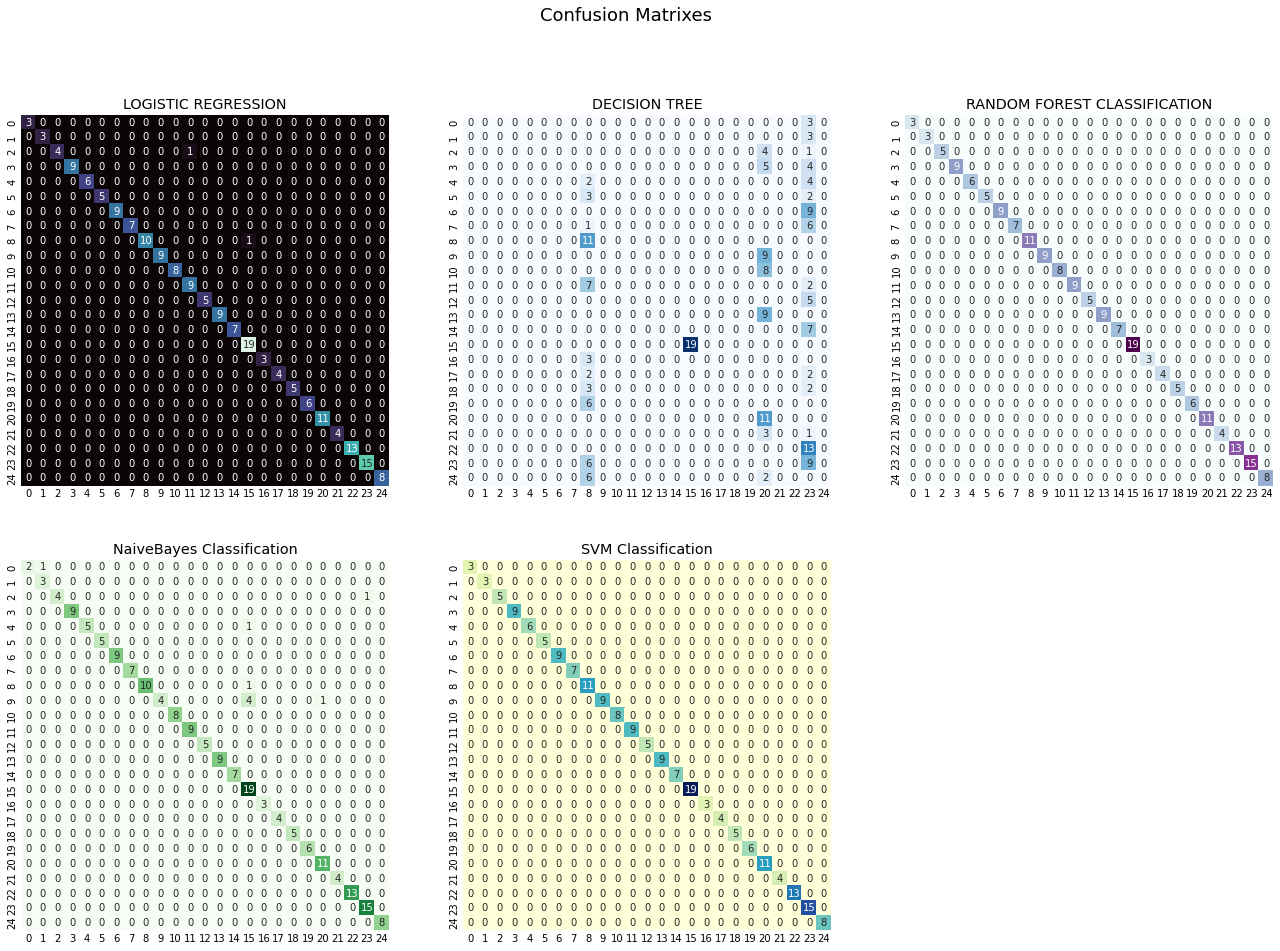

In [53]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("LOGISTIC REGRESSION")
sns.heatmap(logistic_cm, cbar=False, annot=True, cmap="mako",  fmt="d")

plt.subplot(2,3,2)
plt.title("DECISION TREE")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="Blues", fmt="d")

plt.subplot(2,3,3)
plt.title("RANDOM FOREST CLASSIFICATION")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(mb_cm, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(2,3,5)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

plt.show()

In [54]:
table = {'Classifier' : ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'MULTINOMIAL NAIVE BAYES', 'SUPPORT VECTOR MACHINE'], 'Accuracy_Score' : [accuracy_log, accuracy_dt, accuracy_rf, accuracy_mb, accuracy_svm], 'Precision_Score' : [precision_log, precision_dt, precision_rf, precision_mb, precision_svm], 'Recall_Score' : [recall_log, recall_dt, recall_rf, recall_mb, recall_svm], 'F1-Score' : [f1_log, f1_dt, f1_rf, f1_mb, f1_svm]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,LOGISTIC REGRESSION,0.9896,0.9940,0.9884,0.9905
1,DECISION TREE,0.2591,0.0624,0.1440,0.0768
2,RANDOM FOREST,1.0000,1.0000,1.0000,1.0000
3,MULTINOMIAL NAIVE BAYES,0.9534,0.9746,0.9461,0.9524
4,SUPPORT VECTOR MACHINE,1.0000,1.0000,1.0000,1.0000


#ACCURACY COMPARISION PLOT

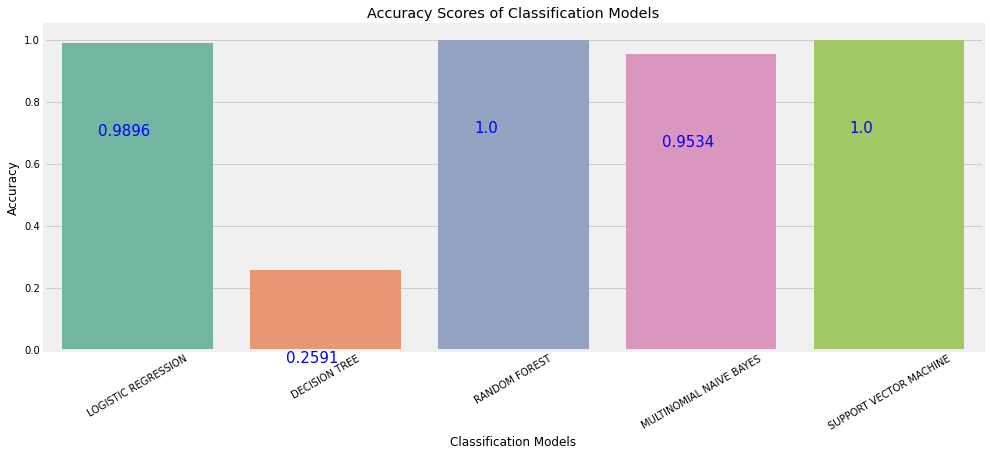

In [55]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

In [56]:
import pickle
from pickle import dump
from pickle import load

In [57]:
 dump(RF ,open('Random_Forest_model.pkl','wb'))

In [58]:
loaded_model = load(open('Random_Forest_model.pkl','rb'))